In [1]:
from zumi.zumi import Zumi
from zumi.util.screen import Screen
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
import IPython.display
import pickle

zumi = Zumi()
zumi.reset_gyro()

zumi.MIN_I2C_DELAY = 0.0
zumi.MAX_USER_SPEED = 127

def column(column_number, matrix):
    return [row[column_number] for row in matrix]

 Starting Zumi 
Pi Zero I2C is available
Gyro offset file already exists.
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected


Creating new offset file...
.
.
starting
done


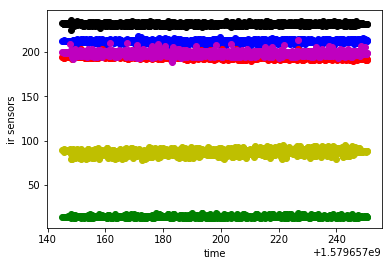

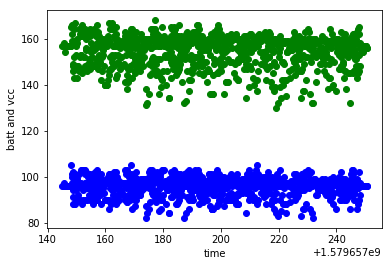

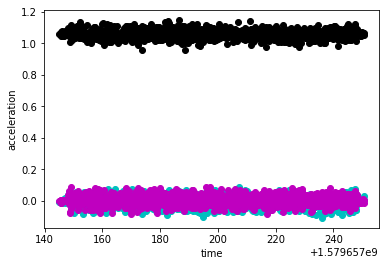

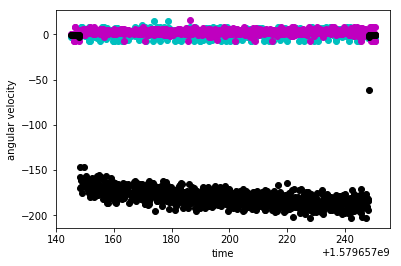

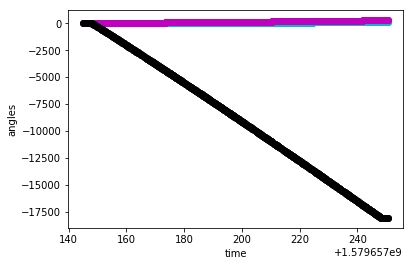

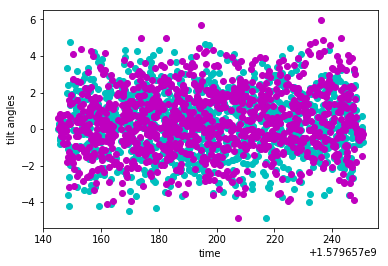

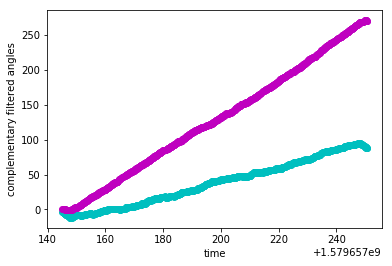

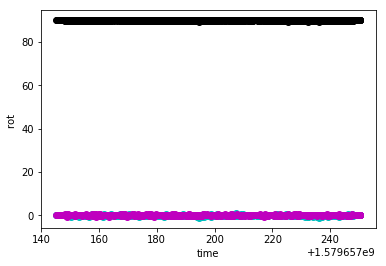

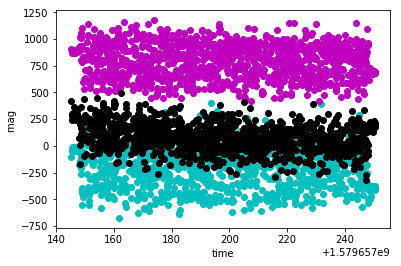

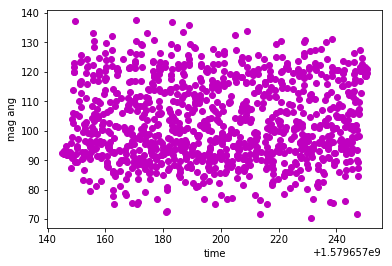

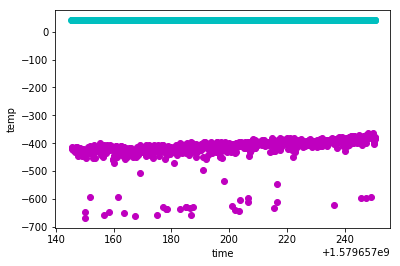

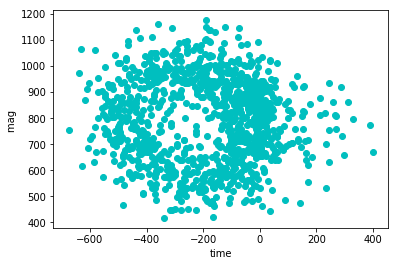

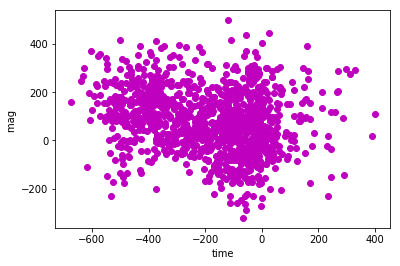

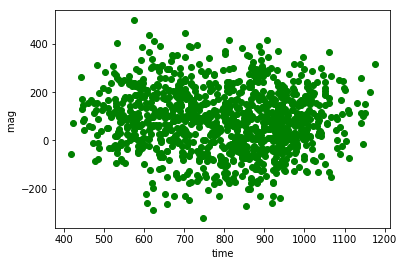

In [2]:
zumi.reset_gyro()
zumi.mpu.calibrate_MPU(100)


time_out = 100
speed = 3
time_passed = 0

sensor_list = []

print("starting")

for i in range(25):
    current_time = time.time()
    zumi.update_angles()
    arduino_readings = zumi.get_all_arduino_data()
    arduino_readings.insert(0,current_time)
    comp_data = zumi.compass.get_data()
    comp_data.append(zumi.compass.get_bearing())
    sensor_list.append(arduino_readings+
                       zumi.mpu_list+
                       zumi.angle_list+
                       comp_data)
    
zumi.control_motors(-speed,speed)

init_time = time.time()

while(time_passed <= time_out):
    current_time = time.time()
    time_passed = current_time-init_time
    zumi.update_angles()
    arduino_readings = zumi.get_all_arduino_data()
    arduino_readings.insert(0,current_time)
    comp_data = zumi.compass.get_data()
    comp_data.append(zumi.compass.get_bearing())
    sensor_list.append(arduino_readings+
                       zumi.mpu_list+
                       zumi.angle_list+
                       comp_data)
  
zumi.stop()

for i in range(25):
    current_time = time.time()
    zumi.update_angles()
    arduino_readings = zumi.get_all_arduino_data()
    arduino_readings.insert(0,current_time)
    comp_data = zumi.compass.get_data()
    comp_data.append(zumi.compass.get_bearing())
    sensor_list.append(arduino_readings+
                       zumi.mpu_list+
                       zumi.angle_list+
                       comp_data)
    
print("done")
file = open("test.data", "wb")
pickle.dump(sensor_list,file)
file.close()    

#0 time elapsed
#1-6 ir sensors
plt.plot(column(0,sensor_list),column(1,sensor_list),'bo',
         column(0,sensor_list),column(2,sensor_list),'yo',
         column(0,sensor_list),column(3,sensor_list),'ro',
         column(0,sensor_list),column(4,sensor_list),'go',
         column(0,sensor_list),column(5,sensor_list),'mo',
         column(0,sensor_list),column(6,sensor_list),'ko',)
plt.ylabel('ir sensors')
plt.xlabel('time')
plt.show()

#7 battery
#8 vcc rail
#9 version
plt.plot(column(0,sensor_list),column(7,sensor_list),'go',
         column(0,sensor_list),column(8,sensor_list),'bo',)
plt.ylabel('batt and vcc')
plt.xlabel('time')
plt.show()

#11 acc x
#12 acc y
#13 acc z
plt.plot(column(0,sensor_list),column(11,sensor_list),'co',
         column(0,sensor_list),column(12,sensor_list),'mo',
         column(0,sensor_list),column(13,sensor_list),'ko',)
plt.ylabel('acceleration')
plt.xlabel('time')
plt.show()

#14 angv x
#15 angv y
#16 angv z
plt.plot(column(0,sensor_list),column(14,sensor_list),'co',
         column(0,sensor_list),column(15,sensor_list),'mo',
         column(0,sensor_list),column(16,sensor_list),'ko',)
plt.ylabel('angular velocity')
plt.xlabel('time')
plt.show()


#18 angle x
#19 angle y
#20 angle z 
plt.plot(column(0,sensor_list),column(18,sensor_list),'co',
         column(0,sensor_list),column(19,sensor_list),'mo',
         column(0,sensor_list),column(20,sensor_list),'ko',)
plt.ylabel('angles')
plt.xlabel('time')
plt.show()


#21 tilt x
#22 tilt y
plt.plot(column(0,sensor_list),column(21,sensor_list),'co',
         column(0,sensor_list),column(22,sensor_list),'mo',)
plt.ylabel('tilt angles')
plt.xlabel('time')
plt.show()


#23 complem ang x
#24 complem ang y
plt.plot(column(0,sensor_list),column(23,sensor_list),'co',
         column(0,sensor_list),column(24,sensor_list),'mo',)
plt.ylabel('complementary filtered angles')
plt.xlabel('time')
plt.show()

#25 rotation x
#26 rotation y
#27 rotation z
plt.plot(column(0,sensor_list),column(25,sensor_list),'co',
         column(0,sensor_list),column(26,sensor_list),'mo',
         column(0,sensor_list),column(27,sensor_list),'ko',)
plt.ylabel('rot ')
plt.xlabel('time')
plt.show()
#27 empty

#magnetic field 
#29 mag x 
plt.plot(column(0,sensor_list),column(29,sensor_list),'co',
         column(0,sensor_list),column(30,sensor_list),'mo',
         column(0,sensor_list),column(31,sensor_list),'ko',)
plt.ylabel('mag ')
plt.xlabel('time')
plt.show()

#33 mag ang
plt.plot(column(0,sensor_list),column(33,sensor_list),'mo',)
plt.ylabel('mag ang')
plt.xlabel('time')
plt.show()

#17 temperature
plt.plot(column(0,sensor_list),column(17,sensor_list),'co',
         column(0,sensor_list),column(32,sensor_list),'mo',)
plt.ylabel('temp')
plt.xlabel('time')
plt.show()

plt.plot(column(29,sensor_list),column(30,sensor_list),'co')
plt.ylabel('mag ')
plt.xlabel('time')
plt.show()

plt.plot(column(29,sensor_list),column(31,sensor_list),'mo')
plt.ylabel('mag ')
plt.xlabel('time')
plt.show()

plt.plot(column(30,sensor_list),column(31,sensor_list),'go')
plt.ylabel('mag ')
plt.xlabel('time')
plt.show()

In [3]:
import circle_fit as cf

#magnetic field 
#29 mag x 
mag_x_list = column(29,sensor_list)
mag_y_list = column(30,sensor_list)
mag_z_list = column(31,sensor_list)

data = list(zip(mag_x_list, mag_y_list))

xc,yc,r,_ = cf.least_squares_circle((data))
print(xc, " ", yc, " r ", r)

-230.75067372728657   777.4432315618881  r  240.78306927183968


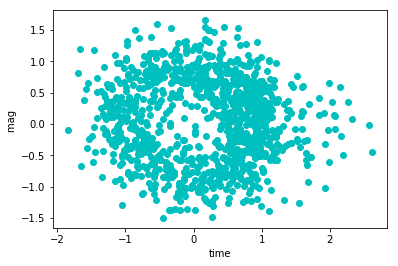

In [4]:
import math

#magnetic field 
#29 mag x
time_list =  column(0,sensor_list)
mag_x_list = column(29,sensor_list)
mag_y_list = column(30,sensor_list)
mag_z_list = column(31,sensor_list)

for i in range(len(mag_x_list)):
    mag_x_list[i] = (mag_x_list[i]- xc)/r
for i in range(len(mag_y_list)):
    mag_y_list[i] = (mag_y_list[i]- yc)/r

plt.plot(mag_x_list,mag_y_list,'co')
plt.ylabel('mag ')
plt.xlabel('time')
plt.show()

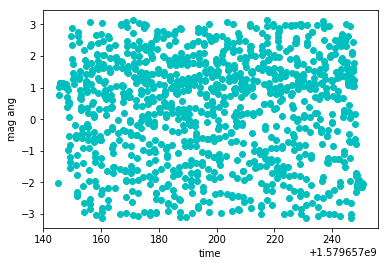

In [5]:
mag_ang_list = []
for i in range(len(mag_x_list)):
    mag_ang_list.append(math.atan2(mag_x_list[i-1],mag_y_list[i-1]))
    
plt.plot(time_list[],mag_ang_list[],'co')
plt.ylabel('mag ang')
plt.xlabel('time')
plt.show()